## UrFunny Original Features

In [ ]:
!wget -O urfunny_features.zip https://www.dropbox.com/sh/9h0pcqmqoplx9p2/AAC8yYikSBVYCSFjm3afFHQva?dl=1
!unzip -o urfunny_features.zip

import pickle
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F

with open('data_folds.pkl', 'rb') as f:
    data_folds = pickle.load(f)
with open('language_sdk.pkl', 'rb') as f:
    language_sdk = pickle.load(f)
with open('openface_features_sdk.pkl', 'rb') as f:
    openface_features_sdk = pickle.load(f)
with open('covarep_features_sdk.pkl', 'rb') as f:
    covarep_features_sdk = pickle.load(f)
with open('humor_label_sdk.pkl', 'rb') as f:
    humor_label_sdk = pickle.load(f)
with open('word_embedding_list.pkl', 'rb') as f:
    word_embedding_list = pickle.load(f)

print("Data folds:")
for fold in data_folds:
    print(f"  {fold}: {len(data_folds[fold])} samples")

sample_id = data_folds['train'][0]
print("\nSample video segment features:")
print(f"ID: {sample_id}")
print("\nLanguage features:")
print(f"  Punchline words: {len(language_sdk[sample_id]['punchline_embedding_indexes'])}")
print(f"  Context sentences: {len(language_sdk[sample_id]['context_embedding_indexes'])}")
print("\nVisual features:")
print(f"  Punchline shape: {np.array(openface_features_sdk[sample_id]['punchline_features']).shape}")
print(f"  Context shape: {len(openface_features_sdk[sample_id]['context_features'])}")
print("\nAcoustic features:")
print(f"  Punchline shape: {np.array(covarep_features_sdk[sample_id]['punchline_features']).shape}")
print(f"  Context shape: {len(covarep_features_sdk[sample_id]['context_features'])}")
print(f"\nHumor label: {humor_label_sdk[sample_id]}")
print(f"\nWord embedding dimension: {len(word_embedding_list[0])}")

--2025-04-28 05:38:20--  https://www.dropbox.com/sh/9h0pcqmqoplx9p2/AAC8yYikSBVYCSFjm3afFHQva?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fo/bt57hdswr8ryay34lsyau/ALP3BB4Dm6_C-UhWfK_pD_Y?rlkey=ct9kmz3lu2vth7katx9jcdbpb&dl=1 [following]
--2025-04-28 05:38:20--  https://www.dropbox.com/scl/fo/bt57hdswr8ryay34lsyau/ALP3BB4Dm6_C-UhWfK_pD_Y?rlkey=ct9kmz3lu2vth7katx9jcdbpb&dl=1
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb3df300860c7b573f5b268552f.dl.dropboxusercontent.com/zip_download_get/CMAkYdBuU0QxbA3vF4h5OfyXWxYmOCyqtf0CjTBtC4M_LNd8K3CVsK6kvlYXjpBUVwdoiMKKmWes9Dwx2TZ5azqHV5RUt_1cRvOcZNAfPvx3Zw# [following]
--2025-04-28 05:38:21--  https://ucb3df300860c7b573f5b268552f.dl.dropboxusercontent.com/zip_

## New Features

In [ ]:
import os
import shutil

video_dir = "/content/drive/MyDrive/VLMS FOR FUNDUS IMAGES/urfunny2_refined"
text_src = "/content/drive/MyDrive/urfunny2_text_feature_pkl"
audio_src = "/content/drive/MyDrive/urfunny2_audios_pkl"
text_dst = "/content/drive/MyDrive/VLMS FOR FUNDUS IMAGES/urfunny2_1322_text_feature_pkl"
audio_dst = "/content/drive/MyDrive/VLMS FOR FUNDUS IMAGES/urfunny2_1322_audios_feature_pkl"

os.makedirs(text_dst, exist_ok=True)
os.makedirs(audio_dst, exist_ok=True)

video_ids = set(os.path.splitext(f)[0] for f in os.listdir(video_dir) if f.endswith(".mp4"))

count_text = 0
for vid in video_ids:
    src = os.path.join(text_src, f"{vid}.pkl")
    dst = os.path.join(text_dst, f"{vid}.pkl")
    if os.path.exists(src):
        shutil.copyfile(src, dst)
        count_text += 1

count_audio = 0
for vid in video_ids:
    src = os.path.join(audio_src, f"{vid}.pkl")
    dst = os.path.join(audio_dst, f"{vid}.pkl")
    if os.path.exists(src):
        shutil.copyfile(src, dst)
        count_audio += 1

print(f"Completed: text: {count_text}，audio: {count_audio}")

In [ ]:
import os

visual_dir = "/content/zip files/new_yo/urfunny2_visual_pkl"
audio_dir = "/content/zip files/new_yo/urfunny2_1322_audios_feature_pkl"
# text_dir = "/content/drive/MyDrive/VLMS FOR FUNDUS IMAGES/urfunny2_1322_text_feature_pkl"

visual_ids = set(os.path.splitext(f)[0] for f in os.listdir(visual_dir) if f.endswith(".pkl"))
audio_ids = set(os.path.splitext(f)[0] for f in os.listdir(audio_dir) if f.endswith(".pkl"))
text_ids  = set(os.path.splitext(f)[0] for f in os.listdir(text_dir)  if f.endswith(".pkl"))

intersection = visual_ids & audio_ids & text_ids

print(f"Number of visual files: {len(visual_ids)}")
print(f"Number of audio files: {len(audio_ids)}")
print(f"Number of text files: {len(text_ids)}")
print(f"Number of files aligned across all modalities: {len(intersection)}")

Number of visual files: 1322
Number of audio files: 1322
Number of text files: 1322
Number of files aligned across all modalities: 1322


In [ ]:
!apt-get install p7zip-full

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
p7zip-full is already the newest version (16.02+dfsg-8).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


In [ ]:
!7z x "/content/zip files/urfunny2_visual_pkl-20250427T063933Z-002.zip" -o"/content/zip files/new_yo"


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/zip files/                             1 file, 897999128 bytes (857 MiB)

Extracting archive: /content/zip files/urfunny2_visual_pkl-20250427T063933Z-002.zip
--
Path = /content/zip files/urfunny2_visual_pkl-20250427T063933Z-002.zip
Type = zip
Physical Size = 897999128

  0%      1% 3 - urfunny2_visual_pkl/3999.pkl                                       3% 10 - urfunny2_visual_pkl/3609.pkl                                        4% 17 - urfunny2_visual_pkl/3801.pkl                              

In [ ]:
!cp -r "/content/drive/MyDrive/multimodal/zip files" /content/

In [ ]:
!cat "/content/zip files/urfunny2_1322_audios_feature_pkl-20250427T063814Z-"*.zip > "/content/zip files/urfunny2_audio.zip"

In [ ]:
!cat "/content/zip files/urfunny2_visual_pkl-20250427T063933Z-"*.zip > "/content/zip files/urfunny2_visual.zip"

In [ ]:
# !unzip -o "/content/zip files/urfunny2_audio.zip" -d "/content/zip files/full_features"
!unzip -o "/content/zip files/urfunny2_1322_text_feature_pkl-20250427T063141Z-001.zip" -d "/content/zip files/full_features"
!unzip -o "/content/zip files/urfunny2_visual.zip" -d "/content/zip files/full_features"

## Visual Classification - Original Features

In [ ]:
# Visual feature classification(punchline only) using MLP and Transformer models

import pickle
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import accuracy_score, roc_auc_score
from tqdm import tqdm

# torch.manual_seed(2020)
# np.random.seed(2020)

class VisualDataset(Dataset):
    def __init__(self, video_ids, openface_features, labels):
        self.video_ids = video_ids
        self.openface_features = openface_features
        self.labels = labels

    def __len__(self):
        return len(self.video_ids)

    def __getitem__(self, idx):
        video_id = self.video_ids[idx]
        visual_features = np.array(self.openface_features[video_id]['punchline_features'])
        if visual_features.ndim > 1:
            visual_features = np.mean(visual_features, axis=0)
        label = self.labels[video_id]
        return torch.tensor(visual_features, dtype=torch.float32), torch.tensor(label, dtype=torch.long)

class VisualMLP1(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 2)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

class VisualMLP2(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 2)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

class TransformerModel(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.input_proj = nn.Linear(input_dim, 128)
        encoder_layer = nn.TransformerEncoderLayer(d_model=128, nhead=4, dim_feedforward=256, dropout=0.1, batch_first=True)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=2)
        self.classifier = nn.Linear(128, 2)

    def forward(self, x):
        x = self.input_proj(x)
        if x.dim() == 2:
            x = x.unsqueeze(1)
        x = self.transformer(x)
        x = x.mean(dim=1)
        x = self.classifier(x)
        return x

def train_model(model, train_loader, val_loader, device, model_name, epochs=10):
    print(f"Training {model_name}...")
    model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.CrossEntropyLoss()
    best_val_acc = 0
    best_model = None

    for epoch in range(epochs):
        model.train()
        for features, labels in train_loader:
            features, labels = features.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(features)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

        val_acc, val_auc = evaluate_model(model, val_loader, device)
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            best_model = model.state_dict().copy()

    model.load_state_dict(best_model)
    return model

def evaluate_model(model, data_loader, device):
    model.eval()
    all_preds = []
    all_probs = []
    all_labels = []

    with torch.no_grad():
        for features, labels in data_loader:
            features, labels = features.to(device), labels.to(device)
            outputs = model(features)
            _, preds = torch.max(outputs, 1)
            probs = F.softmax(outputs, dim=1)[:, 1]
            all_preds.extend(preds.cpu().numpy())
            all_probs.extend(probs.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    accuracy = accuracy_score(all_labels, all_preds)
    auc = roc_auc_score(all_labels, all_probs)
    return accuracy, auc

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
train_dataset = VisualDataset(data_folds['train'], openface_features_sdk, humor_label_sdk)
val_dataset = VisualDataset(data_folds['dev'], openface_features_sdk, humor_label_sdk)
test_dataset = VisualDataset(data_folds['test'], openface_features_sdk, humor_label_sdk)

sample_features, _ = train_dataset[0]
input_dim = sample_features.shape[0]

batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

model1 = VisualMLP1(input_dim)
model2 = VisualMLP2(input_dim)
model3 = TransformerModel(input_dim)

model1 = train_model(model1, train_loader, val_loader, device, "Simple Visual MLP")
test_acc1, test_auc1 = evaluate_model(model1, test_loader, device)
print(f"Simple Visual MLP - Test Accuracy: {test_acc1:.4f}, AUC: {test_auc1:.4f}")

model2 = train_model(model2, train_loader, val_loader, device, "Better Visual MLP")
test_acc2, test_auc2 = evaluate_model(model2, test_loader, device)
print(f"Better Visual MLP - Test Accuracy: {test_acc2:.4f}, AUC: {test_auc2:.4f}")

model3 = train_model(model3, train_loader, val_loader, device, "Visual Transformer")
test_acc3, test_auc3 = evaluate_model(model3, test_loader, device)
print(f"Visual Transformer - Test Accuracy: {test_acc3:.4f}, AUC: {test_auc3:.4f}")

Training Simple Visual MLP...
Simple Visual MLP - Test Accuracy: 0.5805, AUC: 0.6147
Training Better Visual MLP...
Better Visual MLP - Test Accuracy: 0.5795, AUC: 0.6142
Training Visual Transformer...
Visual Transformer - Test Accuracy: 0.5775, AUC: 0.6136


## Unimodal Classification (Text Only, Full)

In [ ]:
import os
import pickle
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
from tqdm import tqdm
import joblib

text_dir = "/content/zip files/full_features/urfunny2_1322_text_feature_pkl"
label_path = "/content/humor_label_sdk.pkl"

with open(label_path, "rb") as f:
    label_dict = pickle.load(f)

def safe_pool(x):
    if isinstance(x, torch.Tensor):
        x = x.cpu().numpy()
    x = np.array(x)
    while x.ndim > 2:
        x = np.squeeze(x, axis=0)
    if x.ndim == 2:
        x = np.mean(x, axis=0)
    return x

def prepare_text_data(text_dir, label_dict):
    X, y = [], []
    for fname in tqdm(sorted(os.listdir(text_dir)), desc="Preparing text data"):
        if not fname.endswith(".pkl"):
            continue
        try:
            vid = int(os.path.splitext(fname)[0])
            if vid not in label_dict:
                continue

            with open(os.path.join(text_dir, f"{vid}.pkl"), "rb") as f:
                text_feat = joblib.load(f)

            if isinstance(text_feat, dict):
                if 'punchline_embedding' in text_feat:
                    text_feat = text_feat['punchline_embedding']
                else:
                    raise ValueError(f"No punchline_embedding found in {fname}")

            if text_feat is None or len(text_feat) == 0:
                raise ValueError(f"Text feature is None or empty for {fname}")

            text_feat = safe_pool(text_feat)
            X.append(text_feat)
            y.append(label_dict[vid])

        except Exception as e:
            print(f"Skipping {fname}: {e}")

    return np.array(X), np.array(y)

class TextDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)
    def __len__(self):
        return len(self.X)
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]


# Model 1: Simple MLP
class TextMLP1(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 2)
        )
    def forward(self, x):
        return self.net(x)

# Model 2: Deeper MLP
class TextMLP2(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 2)
        )
    def forward(self, x):
        return self.net(x)

# Model 3: MLP with dropout
class TextMLP3(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, 2)
        )
    def forward(self, x):
        return self.net(x)

def train_model(model, train_loader, val_loader, device):
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
    criterion = nn.CrossEntropyLoss()
    for epoch in range(1, 11):
        model.train()
        for xb, yb in train_loader:
            xb, yb = xb.to(device), yb.to(device)
            optimizer.zero_grad()
            output = model(xb)
            loss = criterion(output, yb)
            loss.backward()
            optimizer.step()

def evaluate_model(model, loader, device):
    model.eval()
    preds, probs, labels = [], [], []
    with torch.no_grad():
        for xb, yb in loader:
            xb, yb = xb.to(device), yb.to(device)
            logits = model(xb)
            probs.extend(F.softmax(logits, dim=1)[:, 1].cpu().numpy())
            preds.extend(logits.argmax(dim=1).cpu().numpy())
            labels.extend(yb.cpu().numpy())
    acc = accuracy_score(labels, preds)
    auc = roc_auc_score(labels, probs)
    return acc, auc

def run_text_experiment(text_dir, label_dict, device):
    print("\n====== Running Text Only Classification ======")
    X, y = prepare_text_data(text_dir, label_dict)

    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

    train_loader = DataLoader(TextDataset(X_train, y_train), batch_size=64, shuffle=True)
    val_loader = DataLoader(TextDataset(X_val, y_val), batch_size=64)
    test_loader = DataLoader(TextDataset(X_test, y_test), batch_size=64)

    input_dim = X.shape[1]

    models = [
        ("TextMLP1 (Simple)", TextMLP1(input_dim).to(device)),
        ("TextMLP2 (Deep)", TextMLP2(input_dim).to(device)),
        ("TextMLP3 (With Dropout)", TextMLP3(input_dim).to(device))
    ]

    for name, model in models:
        print(f"Training {name}...")
        train_model(model, train_loader, val_loader, device)
        acc, auc = evaluate_model(model, test_loader, device)
        print(f"{name} - Test Accuracy: {acc:.4f}, AUC: {auc:.4f}")

# if __name__ == "__main__":
#     device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#     run_text_experiment(text_dir, label_dict, device)


====== Running Text Only Classification ======


Preparing text data: 100%|██████████| 1322/1322 [00:03<00:00, 369.59it/s]


Training TextMLP1 (Simple)...
TextMLP1 (Simple) - Test Accuracy: 0.7136, AUC: 0.7662
Training TextMLP2 (Deep)...
TextMLP2 (Deep) - Test Accuracy: 0.7136, AUC: 0.7658
Training TextMLP3 (With Dropout)...
TextMLP3 (With Dropout) - Test Accuracy: 0.7035, AUC: 0.7529


## Unimodal - Text - Temporal Models

Using device: cpu

====== Running Advanced Text-Only Classification ======


Preparing text data: 100%|██████████| 1322/1322 [00:01<00:00, 1186.81it/s]
/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(



Training Transformer Model...


Epoch 1/15: 100%|██████████| 15/15 [00:00<00:00, 36.47it/s]


Epoch 1/15 - Train Loss: 0.6871, Val Loss: 0.6406, Val Acc: 0.6010, Val AUC: 0.6663


Epoch 2/15: 100%|██████████| 15/15 [00:00<00:00, 63.04it/s]


Epoch 2/15 - Train Loss: 0.6279, Val Loss: 0.6197, Val Acc: 0.5960, Val AUC: 0.6705


Epoch 3/15: 100%|██████████| 15/15 [00:00<00:00, 70.96it/s]


Epoch 3/15 - Train Loss: 0.5942, Val Loss: 0.6135, Val Acc: 0.6313, Val AUC: 0.6793


Epoch 4/15: 100%|██████████| 15/15 [00:00<00:00, 72.73it/s]


Epoch 4/15 - Train Loss: 0.5453, Val Loss: 0.6396, Val Acc: 0.6061, Val AUC: 0.6812


Epoch 5/15: 100%|██████████| 15/15 [00:00<00:00, 63.91it/s]


Epoch 5/15 - Train Loss: 0.5298, Val Loss: 0.6378, Val Acc: 0.6313, Val AUC: 0.6799


Epoch 6/15: 100%|██████████| 15/15 [00:00<00:00, 74.26it/s]


Epoch 6/15 - Train Loss: 0.4953, Val Loss: 0.6442, Val Acc: 0.6061, Val AUC: 0.6808


Epoch 7/15: 100%|██████████| 15/15 [00:00<00:00, 76.91it/s]


Epoch 7/15 - Train Loss: 0.4688, Val Loss: 0.6696, Val Acc: 0.6212, Val AUC: 0.6785
Early stopping triggered after 7 epochs

Transformer Model - Test Results
Accuracy: 0.6834, AUC: 0.7229

Classification Report:
              precision    recall  f1-score   support

   Not Funny       0.71      0.64      0.67       101
       Funny       0.66      0.72      0.69        98

    accuracy                           0.68       199
   macro avg       0.69      0.68      0.68       199
weighted avg       0.69      0.68      0.68       199



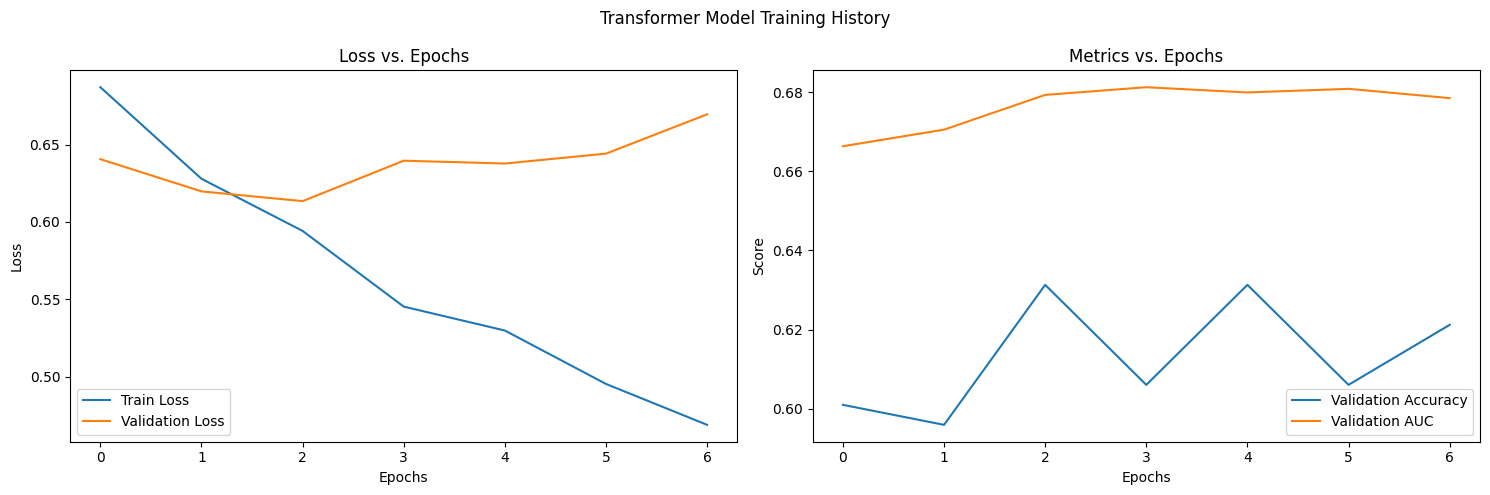

/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(



Training Residual Attention Model...


Epoch 1/15: 100%|██████████| 15/15 [00:00<00:00, 77.87it/s]


Epoch 1/15 - Train Loss: 0.8138, Val Loss: 0.6556, Val Acc: 0.5606, Val AUC: 0.6481


Epoch 2/15: 100%|██████████| 15/15 [00:00<00:00, 85.04it/s]


Epoch 2/15 - Train Loss: 0.6029, Val Loss: 0.6264, Val Acc: 0.5960, Val AUC: 0.6744


Epoch 3/15: 100%|██████████| 15/15 [00:00<00:00, 80.53it/s]


Epoch 3/15 - Train Loss: 0.4833, Val Loss: 0.6404, Val Acc: 0.6263, Val AUC: 0.6665


Epoch 4/15: 100%|██████████| 15/15 [00:00<00:00, 84.71it/s]


Epoch 4/15 - Train Loss: 0.4236, Val Loss: 0.6330, Val Acc: 0.6111, Val AUC: 0.6632


Epoch 5/15: 100%|██████████| 15/15 [00:00<00:00, 79.00it/s]


Epoch 5/15 - Train Loss: 0.3682, Val Loss: 0.6637, Val Acc: 0.6364, Val AUC: 0.6732
Early stopping triggered after 5 epochs

Residual Attention Model - Test Results
Accuracy: 0.6683, AUC: 0.7158

Classification Report:
              precision    recall  f1-score   support

   Not Funny       0.65      0.73      0.69       101
       Funny       0.69      0.60      0.64        98

    accuracy                           0.67       199
   macro avg       0.67      0.67      0.67       199
weighted avg       0.67      0.67      0.67       199



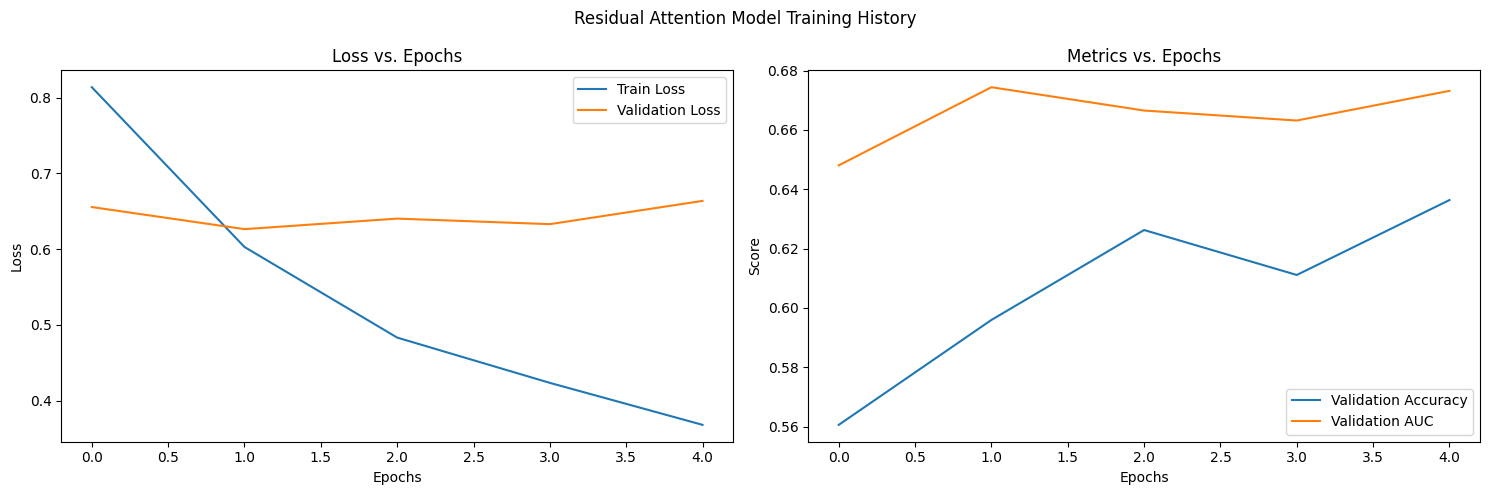

/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(



Training Multi-Scale Model...


Epoch 1/15: 100%|██████████| 15/15 [00:00<00:00, 53.23it/s]


Epoch 1/15 - Train Loss: 0.6932, Val Loss: 0.6869, Val Acc: 0.5202, Val AUC: 0.6468


Epoch 2/15: 100%|██████████| 15/15 [00:00<00:00, 52.19it/s]


Epoch 2/15 - Train Loss: 0.6429, Val Loss: 0.6648, Val Acc: 0.6111, Val AUC: 0.6641


Epoch 3/15: 100%|██████████| 15/15 [00:00<00:00, 64.99it/s]


Epoch 3/15 - Train Loss: 0.5984, Val Loss: 0.6371, Val Acc: 0.6212, Val AUC: 0.6719


Epoch 4/15: 100%|██████████| 15/15 [00:00<00:00, 64.04it/s]


Epoch 4/15 - Train Loss: 0.5688, Val Loss: 0.6175, Val Acc: 0.6263, Val AUC: 0.6787


Epoch 5/15: 100%|██████████| 15/15 [00:00<00:00, 64.50it/s]


Epoch 5/15 - Train Loss: 0.5361, Val Loss: 0.6136, Val Acc: 0.6313, Val AUC: 0.6817


Epoch 6/15: 100%|██████████| 15/15 [00:00<00:00, 60.69it/s]


Epoch 6/15 - Train Loss: 0.5014, Val Loss: 0.6130, Val Acc: 0.6465, Val AUC: 0.6825


Epoch 7/15: 100%|██████████| 15/15 [00:00<00:00, 59.39it/s]


Epoch 7/15 - Train Loss: 0.4742, Val Loss: 0.6182, Val Acc: 0.6313, Val AUC: 0.6874


Epoch 8/15: 100%|██████████| 15/15 [00:00<00:00, 58.19it/s]


Epoch 8/15 - Train Loss: 0.4386, Val Loss: 0.6318, Val Acc: 0.6465, Val AUC: 0.6847


Epoch 9/15: 100%|██████████| 15/15 [00:00<00:00, 60.07it/s]


Epoch 9/15 - Train Loss: 0.4152, Val Loss: 0.6357, Val Acc: 0.6515, Val AUC: 0.6826


Epoch 10/15: 100%|██████████| 15/15 [00:00<00:00, 87.89it/s]


Epoch 10/15 - Train Loss: 0.3809, Val Loss: 0.6645, Val Acc: 0.6364, Val AUC: 0.6886


Epoch 11/15: 100%|██████████| 15/15 [00:00<00:00, 79.11it/s]


Epoch 11/15 - Train Loss: 0.3479, Val Loss: 0.6587, Val Acc: 0.6414, Val AUC: 0.6887


Epoch 12/15: 100%|██████████| 15/15 [00:00<00:00, 89.10it/s]


Epoch 12/15 - Train Loss: 0.3089, Val Loss: 0.6989, Val Acc: 0.6162, Val AUC: 0.6829


Epoch 13/15: 100%|██████████| 15/15 [00:00<00:00, 86.77it/s]


Epoch 13/15 - Train Loss: 0.2778, Val Loss: 0.7110, Val Acc: 0.6364, Val AUC: 0.6878


Epoch 14/15: 100%|██████████| 15/15 [00:00<00:00, 89.11it/s]


Epoch 14/15 - Train Loss: 0.2534, Val Loss: 0.7316, Val Acc: 0.6162, Val AUC: 0.6840
Early stopping triggered after 14 epochs

Multi-Scale Model - Test Results
Accuracy: 0.6633, AUC: 0.7248

Classification Report:
              precision    recall  f1-score   support

   Not Funny       0.65      0.73      0.69       101
       Funny       0.68      0.59      0.63        98

    accuracy                           0.66       199
   macro avg       0.67      0.66      0.66       199
weighted avg       0.67      0.66      0.66       199



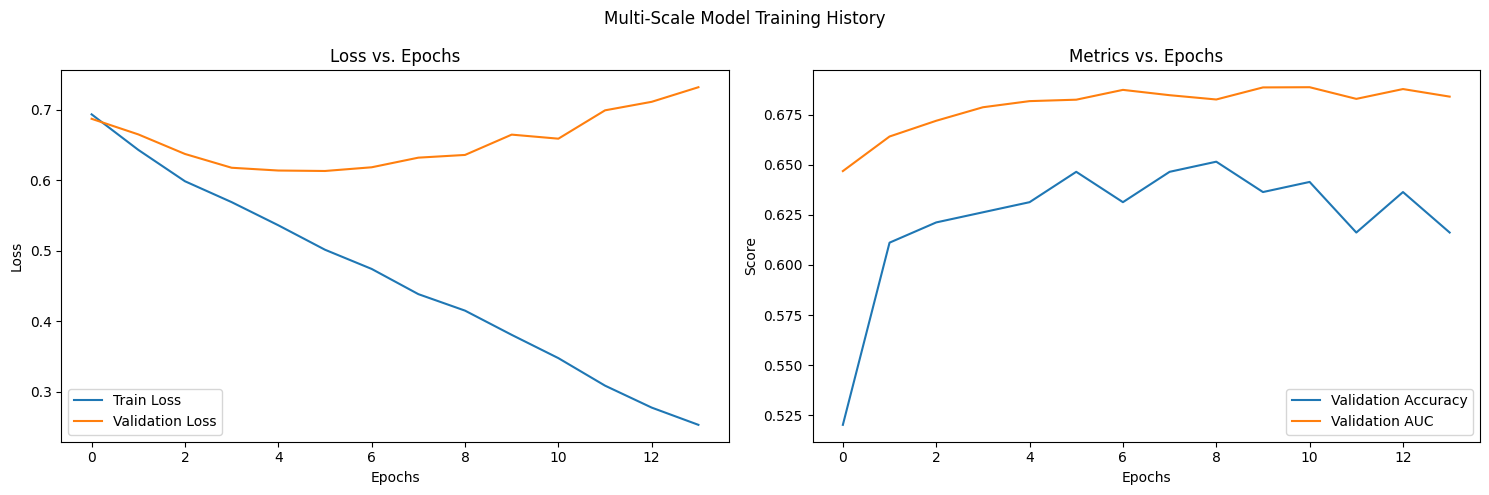

/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(



Training GRU Model...


Epoch 1/15: 100%|██████████| 15/15 [00:00<00:00, 61.16it/s]


Epoch 1/15 - Train Loss: 0.6938, Val Loss: 0.6876, Val Acc: 0.5101, Val AUC: 0.6244


Epoch 2/15: 100%|██████████| 15/15 [00:00<00:00, 62.31it/s]


Epoch 2/15 - Train Loss: 0.6904, Val Loss: 0.6860, Val Acc: 0.5859, Val AUC: 0.6418


Epoch 3/15: 100%|██████████| 15/15 [00:00<00:00, 64.34it/s]


Epoch 3/15 - Train Loss: 0.6868, Val Loss: 0.6797, Val Acc: 0.6162, Val AUC: 0.6570


Epoch 4/15: 100%|██████████| 15/15 [00:00<00:00, 61.12it/s]


Epoch 4/15 - Train Loss: 0.6800, Val Loss: 0.6693, Val Acc: 0.6061, Val AUC: 0.6754


Epoch 5/15: 100%|██████████| 15/15 [00:00<00:00, 64.72it/s]


Epoch 5/15 - Train Loss: 0.6661, Val Loss: 0.6483, Val Acc: 0.6162, Val AUC: 0.6869


Epoch 6/15: 100%|██████████| 15/15 [00:00<00:00, 63.72it/s]


Epoch 6/15 - Train Loss: 0.6409, Val Loss: 0.6238, Val Acc: 0.6364, Val AUC: 0.6940


Epoch 7/15: 100%|██████████| 15/15 [00:00<00:00, 66.11it/s]


Epoch 7/15 - Train Loss: 0.6116, Val Loss: 0.5998, Val Acc: 0.6364, Val AUC: 0.7007


Epoch 8/15: 100%|██████████| 15/15 [00:00<00:00, 60.64it/s]


Epoch 8/15 - Train Loss: 0.5831, Val Loss: 0.6026, Val Acc: 0.6162, Val AUC: 0.7022


Epoch 9/15: 100%|██████████| 15/15 [00:00<00:00, 66.32it/s]


Epoch 9/15 - Train Loss: 0.5531, Val Loss: 0.5931, Val Acc: 0.6566, Val AUC: 0.6985


Epoch 10/15: 100%|██████████| 15/15 [00:00<00:00, 66.24it/s]


Epoch 10/15 - Train Loss: 0.5274, Val Loss: 0.6010, Val Acc: 0.6465, Val AUC: 0.6974


Epoch 11/15: 100%|██████████| 15/15 [00:00<00:00, 66.98it/s]


Epoch 11/15 - Train Loss: 0.5086, Val Loss: 0.6289, Val Acc: 0.6515, Val AUC: 0.7000
Early stopping triggered after 11 epochs

GRU Model - Test Results
Accuracy: 0.7136, AUC: 0.7560

Classification Report:
              precision    recall  f1-score   support

   Not Funny       0.69      0.79      0.74       101
       Funny       0.75      0.63      0.69        98

    accuracy                           0.71       199
   macro avg       0.72      0.71      0.71       199
weighted avg       0.72      0.71      0.71       199



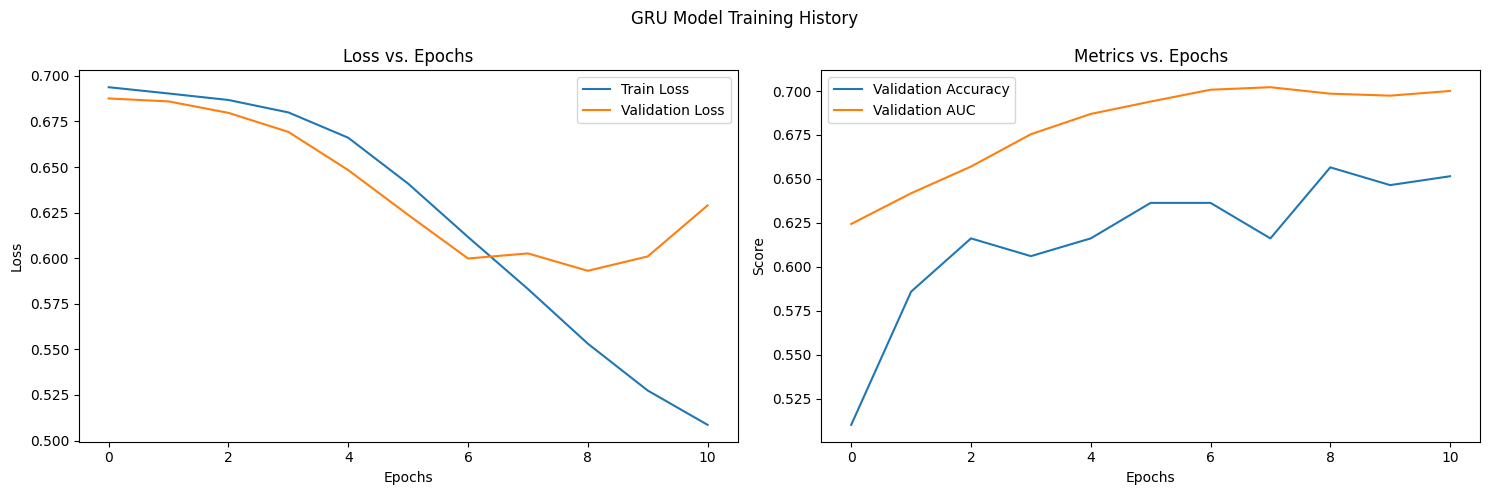

In [ ]:
import os
import pickle
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from tqdm import tqdm
import joblib
import matplotlib.pyplot as plt

text_dir = "/content/zip files/full_features/urfunny2_1322_text_feature_pkl"
label_path = "/content/humor_label_sdk.pkl"

with open(label_path, "rb") as f:
    label_dict = pickle.load(f)

def safe_pool(x):
    if isinstance(x, torch.Tensor):
        x = x.cpu().numpy()
    x = np.array(x)
    while x.ndim > 2:
        x = np.squeeze(x, axis=0)
    if x.ndim == 2:
        x = np.mean(x, axis=0)
    return x

def prepare_text_data(text_dir, label_dict):
    X, y = [], []
    for fname in tqdm(sorted(os.listdir(text_dir)), desc="Preparing text data"):
        if not fname.endswith(".pkl"):
            continue
        try:
            vid = int(os.path.splitext(fname)[0])
            if vid not in label_dict:
                continue

            with open(os.path.join(text_dir, f"{vid}.pkl"), "rb") as f:
                text_feat = joblib.load(f)

            if isinstance(text_feat, dict):
                if 'punchline_embedding' in text_feat:
                    text_feat = text_feat['punchline_embedding']
                else:
                    raise ValueError(f"No punchline_embedding found in {fname}")

            if text_feat is None or len(text_feat) == 0:
                raise ValueError(f"Text feature is None or empty for {fname}")

            text_feat = safe_pool(text_feat)
            X.append(text_feat)
            y.append(label_dict[vid])

        except Exception as e:
            print(f"Skipping {fname}: {e}")

    return np.array(X), np.array(y)

class TextDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)
    def __len__(self):
        return len(self.X)
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Temporal Models

# Model 1: Transformer-based model
class TransformerModel(nn.Module):
    def __init__(self, input_dim, nhead=4, num_layers=2):
        super().__init__()
        self.input_proj = nn.Linear(input_dim, 128)
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=128,
            nhead=nhead,
            dim_feedforward=256,
            dropout=0.1,
            batch_first=True
        )
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.classifier = nn.Linear(128, 2)

    def forward(self, x):
        if x.dim() == 2:
            x = x.unsqueeze(1)

        x = self.input_proj(x)
        x = self.transformer_encoder(x)
        x = x.mean(dim=1)
        return self.classifier(x)

# Model 2: Residual Network with Attention
class ResidualAttentionModel(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, 256)
        self.bn1 = nn.BatchNorm1d(256)
        self.fc2 = nn.Linear(256, 256)
        self.bn2 = nn.BatchNorm1d(256)
        self.attention = nn.Sequential(
            nn.Linear(256, 64),
            nn.Tanh(),
            nn.Linear(64, 1),
            nn.Softmax(dim=1)
        )
        self.fc_out = nn.Linear(256, 2)
        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        identity = self.fc1(x)
        identity = self.bn1(identity)
        identity = F.relu(identity)

        out = self.fc2(identity)
        out = self.bn2(out)
        out = F.relu(out)

        out = out + identity

        attn = self.attention(out.unsqueeze(1))
        out = (out.unsqueeze(1) * attn).sum(1)

        out = self.dropout(out)
        out = self.fc_out(out)
        return out


# Model 3: GRU based model
class GRUModel(nn.Module):
    def __init__(self, input_dim, hidden_dim=128, n_layers=2):
        super().__init__()
        self.projection = nn.Linear(input_dim, hidden_dim)

        self.gru = nn.GRU(
            input_size=hidden_dim,
            hidden_size=hidden_dim,
            num_layers=n_layers,
            batch_first=True,
            bidirectional=True,
            dropout=0.3 if n_layers > 1 else 0
        )

        self.fc = nn.Sequential(
            nn.Linear(hidden_dim*2, hidden_dim),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(hidden_dim, 2)
        )

    def forward(self, x):
        if x.dim() == 2:
            x = x.unsqueeze(1)

        x = self.projection(x)
        output, _ = self.gru(x)
        output = output[:, -1, :]
        return self.fc(output)

def train_model(model, train_loader, val_loader, device, epochs=15, patience=3):
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-5)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
        optimizer, mode='max', factor=0.5, patience=2, verbose=True)
    criterion = nn.CrossEntropyLoss()

    best_val_auc = 0
    patience_counter = 0
    history = {'train_loss': [], 'val_loss': [], 'val_acc': [], 'val_auc': []}

    for epoch in range(1, epochs+1):
        model.train()
        total_loss = 0

        for xb, yb in tqdm(train_loader, desc=f"Epoch {epoch}/{epochs}"):
            xb, yb = xb.to(device), yb.to(device)
            optimizer.zero_grad()
            output = model(xb)
            loss = criterion(output, yb)
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)  # Gradient clipping
            optimizer.step()
            total_loss += loss.item()

        avg_loss = total_loss / len(train_loader)
        history['train_loss'].append(avg_loss)

        val_loss, val_acc, val_auc = validate_model(model, val_loader, criterion, device)
        history['val_loss'].append(val_loss)
        history['val_acc'].append(val_acc)
        history['val_auc'].append(val_auc)

        scheduler.step(val_auc)

        print(f"Epoch {epoch}/{epochs} - Train Loss: {avg_loss:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}, Val AUC: {val_auc:.4f}")

        if val_auc > best_val_auc:
            best_val_auc = val_auc
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print(f"Early stopping triggered after {epoch} epochs")
                break

    return history

def validate_model(model, val_loader, criterion, device):
    model.eval()
    total_loss = 0
    preds, probs, labels = [], [], []

    with torch.no_grad():
        for xb, yb in val_loader:
            xb, yb = xb.to(device), yb.to(device)
            logits = model(xb)
            loss = criterion(logits, yb)
            total_loss += loss.item()

            probs.extend(F.softmax(logits, dim=1)[:, 1].cpu().numpy())
            preds.extend(logits.argmax(dim=1).cpu().numpy())
            labels.extend(yb.cpu().numpy())

    avg_loss = total_loss / len(val_loader)
    acc = accuracy_score(labels, preds)
    auc = roc_auc_score(labels, probs)

    return avg_loss, acc, auc

def evaluate_model(model, loader, device):
    model.eval()
    preds, probs, labels = [], [], []

    with torch.no_grad():
        for xb, yb in loader:
            xb = xb.to(device)
            logits = model(xb)
            probs.extend(F.softmax(logits, dim=1)[:, 1].cpu().numpy())
            preds.extend(logits.argmax(dim=1).cpu().numpy())
            labels.extend(yb.numpy())

    acc = accuracy_score(labels, preds)
    auc = roc_auc_score(labels, probs)
    report = classification_report(labels, preds, target_names=['Not Funny', 'Funny'])

    return acc, auc, report

def plot_training_history(history, title):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    ax1.plot(history['train_loss'], label='Train Loss')
    ax1.plot(history['val_loss'], label='Validation Loss')
    ax1.set_title('Loss vs. Epochs')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.legend()

    ax2.plot(history['val_acc'], label='Validation Accuracy')
    ax2.plot(history['val_auc'], label='Validation AUC')
    ax2.set_title('Metrics vs. Epochs')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Score')
    ax2.legend()

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

def run_text_experiment(text_dir, label_dict, device):
    print("\n====== Running Advanced Text-Only Classification ======")
    X, y = prepare_text_data(text_dir, label_dict)

    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

    train_loader = DataLoader(TextDataset(X_train, y_train), batch_size=64, shuffle=True)
    val_loader = DataLoader(TextDataset(X_val, y_val), batch_size=64)
    test_loader = DataLoader(TextDataset(X_test, y_test), batch_size=64)

    input_dim = X.shape[1]

    models = [
        ("Transformer Model", TransformerModel(input_dim).to(device)),
        ("Residual Attention Model", ResidualAttentionModel(input_dim).to(device)),
        ("GRU Model", GRUModel(input_dim).to(device))
    ]

    for name, model in models:
        print(f"\nTraining {name}...")
        history = train_model(model, train_loader, val_loader, device)
        acc, auc, report = evaluate_model(model, test_loader, device)

        print(f"\n{name} - Test Results")
        print(f"Accuracy: {acc:.4f}, AUC: {auc:.4f}")
        print("\nClassification Report:")
        print(report)

        plot_training_history(history, f"{name} Training History")

# if __name__ == "__main__":
#     device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#     print(f"Using device: {device}")
#     run_text_experiment(text_dir, label_dict, device)


## Unimodal - Audio (New Features)

In [ ]:
import os
import pickle
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
from tqdm import tqdm
import joblib

label_path = "/content/humor_label_sdk.pkl"

with open(label_path, "rb") as f:
    label_dict = pickle.load(f)

def safe_pool(x):
    if isinstance(x, torch.Tensor):
        x = x.cpu().numpy()
    x = np.array(x)
    while x.ndim > 2:
        x = np.squeeze(x, axis=0)
    if x.ndim == 2:
        x = np.mean(x, axis=0)
    return x

def prepare_audio_data(audio_dir, label_dict):
    X, y = [], []
    for fname in tqdm(sorted(os.listdir(audio_dir)), desc="Preparing audio data"):
        if not fname.endswith(".pkl"):
            continue
        try:
            vid = int(os.path.splitext(fname)[0])
            if vid not in label_dict:
                continue
            with open(os.path.join(audio_dir, f"{vid}.pkl"), "rb") as f:
                audio_feat = joblib.load(f)
            if isinstance(audio_feat, dict):
                if 'punchline_embedding' in audio_feat:
                    audio_feat = audio_feat['punchline_embedding']
                else:
                    raise ValueError(f"No punchline_embedding found in {fname}")
            if audio_feat is None or len(audio_feat) == 0:
                raise ValueError(f"Audio feature is None or empty for {fname}")
            audio_feat = safe_pool(audio_feat)
            X.append(audio_feat)
            y.append(label_dict[vid])
        except Exception as e:
            print(f"Skipping {fname}: {e}")
    return np.array(X), np.array(y)

class AudioDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)
    def __len__(self):
        return len(self.X)
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Simple MLP
class SimpleAudioMLP(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 2)
        )
    def forward(self, x):
        return self.net(x)

# Deeper MLP
class AudioMLP(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 2)
        )
    def forward(self, x):
        return self.net(x)

# Transformer model
class AudioTransformer(nn.Module):
    def __init__(self, input_dim, nhead=8, num_layers=2):
        super().__init__()
        self.input_proj = nn.Linear(input_dim, 256)
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=256,
            nhead=nhead,
            dim_feedforward=512,
            dropout=0.2,
            batch_first=True
        )
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.classifier = nn.Linear(256, 2)
    def forward(self, x):
        if x.dim() == 2:
            x = x.unsqueeze(1)
        x = self.input_proj(x)
        x = self.transformer_encoder(x)
        x = x.mean(dim=1)
        return self.classifier(x)

class ResidualAudioNet(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, 256)
        self.bn1 = nn.BatchNorm1d(256)
        self.fc2 = nn.Linear(256, 256)
        self.bn2 = nn.BatchNorm1d(256)
        self.fc3 = nn.Linear(256, 128)
        self.bn3 = nn.BatchNorm1d(128)
        self.dropout = nn.Dropout(0.4)
        self.output = nn.Linear(128, 2)
    def forward(self, x):
        identity = self.fc1(x)
        identity = self.bn1(identity)
        identity = F.relu(identity)
        out = self.fc2(identity)
        out = self.bn2(out)
        out = F.relu(out)
        out = out + identity
        out = self.fc3(out)
        out = self.bn3(out)
        out = F.relu(out)
        out = self.dropout(out)
        return self.output(out)

def train_model(model, train_loader, val_loader, device, epochs=10):
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-5)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=2)
    criterion = nn.CrossEntropyLoss()
    best_val_auc = 0
    for epoch in range(1, epochs+1):
        model.train()
        train_loss = 0
        for xb, yb in tqdm(train_loader, desc=f"Epoch {epoch}/{epochs}"):
            xb, yb = xb.to(device), yb.to(device)
            optimizer.zero_grad()
            output = model(xb)
            loss = criterion(output, yb)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        avg_loss = train_loss / len(train_loader)
        val_acc, val_auc = evaluate_model(model, val_loader, device)
        print(f"Epoch {epoch}/{epochs} - Loss: {avg_loss:.4f}, Val Acc: {val_acc:.4f}, Val AUC: {val_auc:.4f}")
        scheduler.step(val_auc)
        if val_auc > best_val_auc:
            best_val_auc = val_auc

def evaluate_model(model, loader, device):
    model.eval()
    preds, probs, labels = [], [], []
    with torch.no_grad():
        for xb, yb in loader:
            xb = xb.to(device)
            logits = model(xb)
            probs.extend(F.softmax(logits, dim=1)[:, 1].cpu().numpy())
            preds.extend(logits.argmax(dim=1).cpu().numpy())
            labels.extend(yb.numpy())
    acc = accuracy_score(labels, preds)
    auc = roc_auc_score(labels, probs)
    return acc, auc

def run_audio_experiment(audio_dir, label_dict, device):
    print("\n====== Running Wav2Vec Audio Classification ======")
    X, y = prepare_audio_data(audio_dir, label_dict)
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)
    train_loader = DataLoader(AudioDataset(X_train, y_train), batch_size=64, shuffle=True)
    val_loader = DataLoader(AudioDataset(X_val, y_val), batch_size=64)
    test_loader = DataLoader(AudioDataset(X_test, y_test), batch_size=64)
    input_dim = X.shape[1]
    models = [
        ("Very Simple MLP", SimpleAudioMLP(input_dim).to(device)),
        ("Simple AudioMLP", AudioMLP(input_dim).to(device)),
        ("Audio Transformer", AudioTransformer(input_dim).to(device)),
        ("Residual Audio Network", ResidualAudioNet(input_dim).to(device))
    ]
    for name, model in models:
        print(f"\nTraining {name}...")
        train_model(model, train_loader, val_loader, device)
        test_acc, test_auc = evaluate_model(model, test_loader, device)
        print(f"{name} - Test Results: Accuracy: {test_acc:.4f}, AUC: {test_auc:.4f}")

# if __name__ == "__main__":
#     device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#     print(f"Using device: {device}")
#     run_audio_experiment(audio_dir, label_dict, device)

Using device: cpu

====== Running Wav2Vec Audio Classification ======


Preparing audio data: 100%|██████████| 1322/1322 [00:44<00:00, 29.70it/s]



Training Very Simple MLP...


Epoch 1/10: 100%|██████████| 15/15 [00:00<00:00, 239.42it/s]


Epoch 1/10 - Loss: 0.6909, Val Acc: 0.4798, Val AUC: 0.4926


Epoch 2/10: 100%|██████████| 15/15 [00:00<00:00, 249.29it/s]


Epoch 2/10 - Loss: 0.6870, Val Acc: 0.5051, Val AUC: 0.4959


Epoch 3/10: 100%|██████████| 15/15 [00:00<00:00, 278.51it/s]


Epoch 3/10 - Loss: 0.6848, Val Acc: 0.5051, Val AUC: 0.4989


Epoch 4/10: 100%|██████████| 15/15 [00:00<00:00, 276.54it/s]


Epoch 4/10 - Loss: 0.6848, Val Acc: 0.4949, Val AUC: 0.4998


Epoch 5/10: 100%|██████████| 15/15 [00:00<00:00, 273.92it/s]


Epoch 5/10 - Loss: 0.6805, Val Acc: 0.5202, Val AUC: 0.5021


Epoch 6/10: 100%|██████████| 15/15 [00:00<00:00, 295.52it/s]


Epoch 6/10 - Loss: 0.6798, Val Acc: 0.4899, Val AUC: 0.5026


Epoch 7/10: 100%|██████████| 15/15 [00:00<00:00, 285.01it/s]


Epoch 7/10 - Loss: 0.6765, Val Acc: 0.4798, Val AUC: 0.5033


Epoch 8/10: 100%|██████████| 15/15 [00:00<00:00, 270.02it/s]

Epoch 8/10 - Loss: 0.6768, Val Acc: 0.4798, Val AUC: 0.5038

Epoch 9/10: 100%|██████████| 15/15 [00:00<00:00, 256.05it/s]


Epoch 9/10 - Loss: 0.6753, Val Acc: 0.4949, Val AUC: 0.5077


Epoch 10/10: 100%|██████████| 15/15 [00:00<00:00, 226.75it/s]


Epoch 10/10 - Loss: 0.6741, Val Acc: 0.5000, Val AUC: 0.5085
Very Simple MLP - Test Results: Accuracy: 0.5829, AUC: 0.5716

Training Simple AudioMLP...


Epoch 1/10: 100%|██████████| 15/15 [00:00<00:00, 140.51it/s]


Epoch 1/10 - Loss: 0.6924, Val Acc: 0.4949, Val AUC: 0.5238


Epoch 2/10: 100%|██████████| 15/15 [00:00<00:00, 135.99it/s]


Epoch 2/10 - Loss: 0.6899, Val Acc: 0.5202, Val AUC: 0.5174


Epoch 3/10: 100%|██████████| 15/15 [00:00<00:00, 154.94it/s]


Epoch 3/10 - Loss: 0.6888, Val Acc: 0.5202, Val AUC: 0.5162


Epoch 4/10: 100%|██████████| 15/15 [00:00<00:00, 163.60it/s]


Epoch 4/10 - Loss: 0.6864, Val Acc: 0.5202, Val AUC: 0.5138


Epoch 5/10: 100%|██████████| 15/15 [00:00<00:00, 165.26it/s]


Epoch 5/10 - Loss: 0.6841, Val Acc: 0.5253, Val AUC: 0.5143


Epoch 6/10: 100%|██████████| 15/15 [00:00<00:00, 161.55it/s]


Epoch 6/10 - Loss: 0.6832, Val Acc: 0.5253, Val AUC: 0.5138


Epoch 7/10: 100%|██████████| 15/15 [00:00<00:00, 167.33it/s]


Epoch 7/10 - Loss: 0.6832, Val Acc: 0.5152, Val AUC: 0.5122


Epoch 8/10: 100%|██████████| 15/15 [00:00<00:00, 152.75it/s]


Epoch 8/10 - Loss: 0.6821, Val Acc: 0.5101, Val AUC: 0.5126


Epoch 9/10: 100%|██████████| 15/15 [00:00<00:00, 151.26it/s]


Epoch 9/10 - Loss: 0.6806, Val Acc: 0.5101, Val AUC: 0.5125


Epoch 10/10: 100%|██████████| 15/15 [00:00<00:00, 141.81it/s]


Epoch 10/10 - Loss: 0.6811, Val Acc: 0.5051, Val AUC: 0.5133
Simple AudioMLP - Test Results: Accuracy: 0.5427, AUC: 0.5639

Training Audio Transformer...


Epoch 1/10: 100%|██████████| 15/15 [00:00<00:00, 28.75it/s]


Epoch 1/10 - Loss: 0.7361, Val Acc: 0.5051, Val AUC: 0.5390


Epoch 2/10: 100%|██████████| 15/15 [00:00<00:00, 26.98it/s]


Epoch 2/10 - Loss: 0.6905, Val Acc: 0.5152, Val AUC: 0.5449


Epoch 3/10: 100%|██████████| 15/15 [00:00<00:00, 40.99it/s]


Epoch 3/10 - Loss: 0.6904, Val Acc: 0.5556, Val AUC: 0.5584


Epoch 4/10: 100%|██████████| 15/15 [00:00<00:00, 41.98it/s]


Epoch 4/10 - Loss: 0.6794, Val Acc: 0.5404, Val AUC: 0.5548


Epoch 5/10: 100%|██████████| 15/15 [00:00<00:00, 38.63it/s]


Epoch 5/10 - Loss: 0.6700, Val Acc: 0.5303, Val AUC: 0.5495


Epoch 6/10: 100%|██████████| 15/15 [00:00<00:00, 42.94it/s]


Epoch 6/10 - Loss: 0.6734, Val Acc: 0.5303, Val AUC: 0.5504


Epoch 7/10: 100%|██████████| 15/15 [00:00<00:00, 41.29it/s]


Epoch 7/10 - Loss: 0.6664, Val Acc: 0.5657, Val AUC: 0.5519


Epoch 8/10: 100%|██████████| 15/15 [00:00<00:00, 42.94it/s]


Epoch 8/10 - Loss: 0.6570, Val Acc: 0.5253, Val AUC: 0.5545


Epoch 9/10: 100%|██████████| 15/15 [00:00<00:00, 42.15it/s]


Epoch 9/10 - Loss: 0.6698, Val Acc: 0.5152, Val AUC: 0.5572


Epoch 10/10: 100%|██████████| 15/15 [00:00<00:00, 40.17it/s]


Epoch 10/10 - Loss: 0.6514, Val Acc: 0.5202, Val AUC: 0.5579
Audio Transformer - Test Results: Accuracy: 0.5075, AUC: 0.5736

Training Residual Audio Network...


Epoch 1/10: 100%|██████████| 15/15 [00:00<00:00, 151.24it/s]


Epoch 1/10 - Loss: 0.7598, Val Acc: 0.5101, Val AUC: 0.5014


Epoch 2/10: 100%|██████████| 15/15 [00:00<00:00, 145.04it/s]


Epoch 2/10 - Loss: 0.6817, Val Acc: 0.5051, Val AUC: 0.5133


Epoch 3/10: 100%|██████████| 15/15 [00:00<00:00, 158.23it/s]


Epoch 3/10 - Loss: 0.6171, Val Acc: 0.5101, Val AUC: 0.5030


Epoch 4/10: 100%|██████████| 15/15 [00:00<00:00, 153.39it/s]


Epoch 4/10 - Loss: 0.5940, Val Acc: 0.5101, Val AUC: 0.5010


Epoch 5/10: 100%|██████████| 15/15 [00:00<00:00, 164.39it/s]


Epoch 5/10 - Loss: 0.5585, Val Acc: 0.5152, Val AUC: 0.4890


Epoch 6/10: 100%|██████████| 15/15 [00:00<00:00, 144.52it/s]


Epoch 6/10 - Loss: 0.5382, Val Acc: 0.5152, Val AUC: 0.4924


Epoch 7/10: 100%|██████████| 15/15 [00:00<00:00, 161.31it/s]


Epoch 7/10 - Loss: 0.5232, Val Acc: 0.5101, Val AUC: 0.4909


Epoch 8/10: 100%|██████████| 15/15 [00:00<00:00, 123.91it/s]


Epoch 8/10 - Loss: 0.5096, Val Acc: 0.5000, Val AUC: 0.4979


Epoch 9/10: 100%|██████████| 15/15 [00:00<00:00, 159.71it/s]


Epoch 9/10 - Loss: 0.4970, Val Acc: 0.5152, Val AUC: 0.4921


Epoch 10/10: 100%|██████████| 15/15 [00:00<00:00, 158.12it/s]

Epoch 10/10 - Loss: 0.4859, Val Acc: 0.5000, Val AUC: 0.4893
Residual Audio Network - Test Results: Accuracy: 0.5477, AUC: 0.5508


## Unimodal - Visual (New Features)

In [ ]:
import os
import pickle
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
from tqdm import tqdm
import joblib

visual_dir = "/content/zip files/full_features/urfunny2_visual_pkl"
label_path = "/content/humor_label_sdk.pkl"

with open(label_path, "rb") as f:
    label_dict = pickle.load(f)

def safe_pool(x):
    if isinstance(x, torch.Tensor):
        x = x.cpu().numpy()
    x = np.array(x)
    while x.ndim > 2:
        x = np.squeeze(x, axis=0)
    if x.ndim == 2:
        x = np.mean(x, axis=0)
    return x

def prepare_visual_data(visual_dir, label_dict):
    X, y = []
    for fname in tqdm(sorted(os.listdir(visual_dir)), desc="Preparing visual data"):
        if not fname.endswith(".pkl"):
            continue
        try:
            vid = int(os.path.splitext(fname)[0])
            if vid not in label_dict:
                continue
            with open(os.path.join(visual_dir, f"{vid}.pkl"), "rb") as f:
                visual_feat = joblib.load(f)
            if isinstance(visual_feat, dict):
                if 'punchline_embedding' in visual_feat:
                    visual_feat = visual_feat['punchline_embedding']
                else:
                    raise ValueError(f"No punchline_embedding found in {fname}")
            if visual_feat is None or len(visual_feat) == 0:
                raise ValueError(f"Visual feature is None or empty for {fname}")
            visual_feat = safe_pool(visual_feat)
            X.append(visual_feat)
            y.append(label_dict[vid])
        except Exception as e:
            print(f"Skipping {fname}: {e}")
    return np.array(X), np.array(y)

class VisualDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)
    def __len__(self):
        return len(self.X)
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

class SimpleVisualMLP(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 2)
        )
    def forward(self, x):
        return self.net(x)

class VisualMLP(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 2)
        )
    def forward(self, x):
        return self.net(x)

class VisualTransformer(nn.Module):
    def __init__(self, input_dim, nhead=8, num_layers=2):
        super().__init__()
        self.input_proj = nn.Linear(input_dim, 256)
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=256,
            nhead=nhead,
            dim_feedforward=512,
            dropout=0.2,
            batch_first=True
        )
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.classifier = nn.Linear(256, 2)

    def forward(self, x):
        if x.dim() == 2:
            x = x.unsqueeze(1)
        x = self.input_proj(x)
        x = self.transformer_encoder(x)
        x = x.mean(dim=1)
        return self.classifier(x)

class ResidualVisualNet(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, 256)
        self.bn1 = nn.BatchNorm1d(256)
        self.fc2 = nn.Linear(256, 256)
        self.bn2 = nn.BatchNorm1d(256)
        self.fc3 = nn.Linear(256, 128)
        self.bn3 = nn.BatchNorm1d(128)
        self.dropout = nn.Dropout(0.4)
        self.output = nn.Linear(128, 2)

    def forward(self, x):
        identity = self.fc1(x)
        identity = self.bn1(identity)
        identity = F.relu(identity)
        out = self.fc2(identity)
        out = self.bn2(out)
        out = F.relu(out)
        out = out + identity
        out = self.fc3(out)
        out = self.bn3(out)
        out = F.relu(out)
        out = self.dropout(out)
        return self.output(out)

def train_model(model, train_loader, val_loader, device, epochs=10):
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-5)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=2)
    criterion = nn.CrossEntropyLoss()
    best_val_auc = 0
    for epoch in range(1, epochs+1):
        model.train()
        train_loss = 0
        for xb, yb in tqdm(train_loader, desc=f"Epoch {epoch}/{epochs}"):
            xb, yb = xb.to(device), yb.to(device)
            optimizer.zero_grad()
            output = model(xb)
            loss = criterion(output, yb)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        avg_loss = train_loss / len(train_loader)
        val_acc, val_auc = evaluate_model(model, val_loader, device)
        print(f"Epoch {epoch}/{epochs} - Loss: {avg_loss:.4f}, Val Acc: {val_acc:.4f}, Val AUC: {val_auc:.4f}")
        scheduler.step(val_auc)
        if val_auc > best_val_auc:
            best_val_auc = val_auc

def evaluate_model(model, loader, device):
    model.eval()
    preds, probs, labels = [], [], []
    with torch.no_grad():
        for xb, yb in loader:
            xb = xb.to(device)
            logits = model(xb)
            probs.extend(F.softmax(logits, dim=1)[:, 1].cpu().numpy())
            preds.extend(logits.argmax(dim=1).cpu().numpy())
            labels.extend(yb.numpy())
    acc = accuracy_score(labels, preds)
    auc = roc_auc_score(labels, probs)
    return acc, auc

def run_visual_experiment(visual_dir, label_dict, device):
    print("\n====== Running Visual Features Classification ======")
    X, y = prepare_visual_data(visual_dir, label_dict)
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)
    train_loader = DataLoader(VisualDataset(X_train, y_train), batch_size=64, shuffle=True)
    val_loader = DataLoader(VisualDataset(X_val, y_val), batch_size=64)
    test_loader = DataLoader(VisualDataset(X_test, y_test), batch_size=64)
    input_dim = X.shape[1]
    models = [
        ("Very Simple MLP", SimpleVisualMLP(input_dim).to(device)),
        ("Visual MLP", VisualMLP(input_dim).to(device)),
        ("Visual Transformer", VisualTransformer(input_dim).to(device)),
        ("Residual Visual Network", ResidualVisualNet(input_dim).to(device))
    ]
    for name, model in models:
        print(f"\nTraining {name}...")
        train_model(model, train_loader, val_loader, device)
        test_acc, test_auc = evaluate_model(model, test_loader, device)
        print(f"{name} - Test Results: Accuracy: {test_acc:.4f}, AUC: {test_auc:.4f}")

if __name__ == "__main__":
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")
    run_visual_experiment(visual_dir, label_dict, device)


Using device: cpu

====== Running Visual Features Classification ======


Preparing visual data: 100%|██████████| 1322/1322 [00:22<00:00, 58.46it/s]



Training Very Simple MLP...


Epoch 1/10: 100%|██████████| 15/15 [00:00<00:00, 245.95it/s]


Epoch 1/10 - Loss: 0.6971, Val Acc: 0.4646, Val AUC: 0.4708


Epoch 2/10: 100%|██████████| 15/15 [00:00<00:00, 278.96it/s]


Epoch 2/10 - Loss: 0.6884, Val Acc: 0.4697, Val AUC: 0.4610


Epoch 3/10: 100%|██████████| 15/15 [00:00<00:00, 282.59it/s]


Epoch 3/10 - Loss: 0.6785, Val Acc: 0.4596, Val AUC: 0.4452


Epoch 4/10: 100%|██████████| 15/15 [00:00<00:00, 238.05it/s]


Epoch 4/10 - Loss: 0.6748, Val Acc: 0.4495, Val AUC: 0.4374


Epoch 5/10: 100%|██████████| 15/15 [00:00<00:00, 270.09it/s]


Epoch 5/10 - Loss: 0.6692, Val Acc: 0.4747, Val AUC: 0.4390


Epoch 6/10: 100%|██████████| 15/15 [00:00<00:00, 296.36it/s]


Epoch 6/10 - Loss: 0.6662, Val Acc: 0.4646, Val AUC: 0.4345


Epoch 7/10: 100%|██████████| 15/15 [00:00<00:00, 299.21it/s]


Epoch 7/10 - Loss: 0.6628, Val Acc: 0.4394, Val AUC: 0.4309


Epoch 8/10: 100%|██████████| 15/15 [00:00<00:00, 298.03it/s]

Epoch 8/10 - Loss: 0.6608, Val Acc: 0.4697, Val AUC: 0.4338

Epoch 9/10: 100%|██████████| 15/15 [00:00<00:00, 289.42it/s]


Epoch 9/10 - Loss: 0.6582, Val Acc: 0.4293, Val AUC: 0.4323


Epoch 10/10: 100%|██████████| 15/15 [00:00<00:00, 285.23it/s]


Epoch 10/10 - Loss: 0.6574, Val Acc: 0.4394, Val AUC: 0.4318
Very Simple MLP - Test Results: Accuracy: 0.5226, AUC: 0.5290

Training Visual MLP...


Epoch 1/10: 100%|██████████| 15/15 [00:00<00:00, 171.92it/s]


Epoch 1/10 - Loss: 0.6956, Val Acc: 0.5101, Val AUC: 0.5161


Epoch 2/10: 100%|██████████| 15/15 [00:00<00:00, 149.14it/s]


Epoch 2/10 - Loss: 0.6897, Val Acc: 0.5101, Val AUC: 0.5058


Epoch 3/10: 100%|██████████| 15/15 [00:00<00:00, 161.46it/s]


Epoch 3/10 - Loss: 0.6867, Val Acc: 0.5202, Val AUC: 0.4995


Epoch 4/10: 100%|██████████| 15/15 [00:00<00:00, 161.96it/s]


Epoch 4/10 - Loss: 0.6837, Val Acc: 0.5354, Val AUC: 0.4963


Epoch 5/10: 100%|██████████| 15/15 [00:00<00:00, 140.28it/s]


Epoch 5/10 - Loss: 0.6798, Val Acc: 0.5152, Val AUC: 0.4915


Epoch 6/10: 100%|██████████| 15/15 [00:00<00:00, 155.70it/s]


Epoch 6/10 - Loss: 0.6771, Val Acc: 0.5101, Val AUC: 0.4892


Epoch 7/10: 100%|██████████| 15/15 [00:00<00:00, 142.44it/s]


Epoch 7/10 - Loss: 0.6738, Val Acc: 0.5202, Val AUC: 0.4908


Epoch 8/10: 100%|██████████| 15/15 [00:00<00:00, 151.65it/s]


Epoch 8/10 - Loss: 0.6726, Val Acc: 0.5152, Val AUC: 0.4885


Epoch 9/10: 100%|██████████| 15/15 [00:00<00:00, 163.77it/s]


Epoch 9/10 - Loss: 0.6693, Val Acc: 0.5303, Val AUC: 0.4844


Epoch 10/10: 100%|██████████| 15/15 [00:00<00:00, 257.14it/s]


Epoch 10/10 - Loss: 0.6690, Val Acc: 0.5202, Val AUC: 0.4864
Visual MLP - Test Results: Accuracy: 0.5528, AUC: 0.5595

Training Visual Transformer...


Epoch 1/10: 100%|██████████| 15/15 [00:00<00:00, 41.32it/s]


Epoch 1/10 - Loss: 0.7462, Val Acc: 0.4697, Val AUC: 0.4339


Epoch 2/10: 100%|██████████| 15/15 [00:00<00:00, 42.73it/s]


Epoch 2/10 - Loss: 0.7027, Val Acc: 0.4747, Val AUC: 0.4668


Epoch 3/10: 100%|██████████| 15/15 [00:00<00:00, 42.42it/s]


Epoch 3/10 - Loss: 0.6695, Val Acc: 0.4747, Val AUC: 0.4527


Epoch 4/10: 100%|██████████| 15/15 [00:00<00:00, 40.84it/s]


Epoch 4/10 - Loss: 0.6534, Val Acc: 0.4495, Val AUC: 0.4544


Epoch 5/10: 100%|██████████| 15/15 [00:00<00:00, 42.06it/s]


Epoch 5/10 - Loss: 0.6502, Val Acc: 0.4444, Val AUC: 0.4384


Epoch 6/10: 100%|██████████| 15/15 [00:00<00:00, 39.92it/s]


Epoch 6/10 - Loss: 0.6241, Val Acc: 0.4899, Val AUC: 0.4576


Epoch 7/10: 100%|██████████| 15/15 [00:00<00:00, 42.23it/s]


Epoch 7/10 - Loss: 0.6130, Val Acc: 0.4596, Val AUC: 0.4513


Epoch 8/10: 100%|██████████| 15/15 [00:00<00:00, 43.13it/s]


Epoch 8/10 - Loss: 0.6057, Val Acc: 0.4747, Val AUC: 0.4570


Epoch 9/10: 100%|██████████| 15/15 [00:00<00:00, 42.20it/s]


Epoch 9/10 - Loss: 0.5959, Val Acc: 0.4444, Val AUC: 0.4560


Epoch 10/10: 100%|██████████| 15/15 [00:00<00:00, 42.04it/s]


Epoch 10/10 - Loss: 0.5756, Val Acc: 0.4697, Val AUC: 0.4534
Visual Transformer - Test Results: Accuracy: 0.5729, AUC: 0.5801

Training Residual Visual Network...


Epoch 1/10: 100%|██████████| 15/15 [00:00<00:00, 152.92it/s]


Epoch 1/10 - Loss: 0.7473, Val Acc: 0.4747, Val AUC: 0.4597


Epoch 2/10: 100%|██████████| 15/15 [00:00<00:00, 156.42it/s]


Epoch 2/10 - Loss: 0.6911, Val Acc: 0.4949, Val AUC: 0.4555


Epoch 3/10: 100%|██████████| 15/15 [00:00<00:00, 148.38it/s]


Epoch 3/10 - Loss: 0.6494, Val Acc: 0.4899, Val AUC: 0.4761


Epoch 4/10: 100%|██████████| 15/15 [00:00<00:00, 130.34it/s]


Epoch 4/10 - Loss: 0.6015, Val Acc: 0.4949, Val AUC: 0.4784


Epoch 5/10: 100%|██████████| 15/15 [00:00<00:00, 154.78it/s]


Epoch 5/10 - Loss: 0.5607, Val Acc: 0.4949, Val AUC: 0.4827


Epoch 6/10: 100%|██████████| 15/15 [00:00<00:00, 150.74it/s]


Epoch 6/10 - Loss: 0.5508, Val Acc: 0.5101, Val AUC: 0.4775


Epoch 7/10: 100%|██████████| 15/15 [00:00<00:00, 161.52it/s]


Epoch 7/10 - Loss: 0.5110, Val Acc: 0.5505, Val AUC: 0.4794


Epoch 8/10: 100%|██████████| 15/15 [00:00<00:00, 151.73it/s]


Epoch 8/10 - Loss: 0.4886, Val Acc: 0.5253, Val AUC: 0.4767


Epoch 9/10: 100%|██████████| 15/15 [00:00<00:00, 142.44it/s]


Epoch 9/10 - Loss: 0.4743, Val Acc: 0.5202, Val AUC: 0.4773


Epoch 10/10: 100%|██████████| 15/15 [00:00<00:00, 143.89it/s]

Epoch 10/10 - Loss: 0.4534, Val Acc: 0.5303, Val AUC: 0.4749
Residual Visual Network - Test Results: Accuracy: 0.5477, AUC: 0.5538


## Bimodal Fusion (New Features)

In [ ]:
import os
import pickle
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
from tqdm import tqdm
import joblib

visual_dir = "/content/zip files/new_yo/urfunny2_visual_pkl"
audio_dir = "/content/zip files/new_yo/urfunny2_1322_audios_feature_pkl"
text_dir = "/content/zip files/full_features/urfunny2_1322_text_feature_pkl"
label_path = "/content/humor_label_sdk.pkl"

with open(label_path, "rb") as f:
    label_dict = pickle.load(f)

def safe_pool(x):
    if isinstance(x, torch.Tensor):
        x = x.cpu().numpy()
    x = np.array(x)
    while x.ndim > 2:
        x = np.squeeze(x, axis=0)
    if x.ndim == 2:
        x = np.mean(x, axis=0)
    return x

# Combines and processes two modalities for both early and late fusion
def prepare_bimodal_data(modal1_dir, modal2_dir, label_dict):
    X_early, X_late, y_all = [], [], []
    for fname in tqdm(sorted(os.listdir(modal1_dir)), desc="Preparing data"):
        if not fname.endswith(".pkl"):
            continue
        try:
            vid = int(os.path.splitext(fname)[0])
            if vid not in label_dict:
                continue
            with open(os.path.join(modal1_dir, f"{vid}.pkl"), "rb") as f:
                m1_feat = joblib.load(f)
            with open(os.path.join(modal2_dir, f"{vid}.pkl"), "rb") as f:
                m2_feat = joblib.load(f)
            if isinstance(m1_feat, dict):
                if 'punchline_embedding' in m1_feat:
                    m1_feat = m1_feat['punchline_embedding']
                else:
                    raise ValueError(f"No punchline_embedding found in {fname}")
            if isinstance(m2_feat, dict):
                if 'punchline_embedding' in m2_feat:
                    m2_feat = m2_feat['punchline_embedding']
            for name, feat in zip(["modal1", "modal2"], [m1_feat, m2_feat]):
                if feat is None:
                    raise ValueError(f"{name} is None")
                if not isinstance(feat, (np.ndarray, list, torch.Tensor)):
                    raise ValueError(f"{name} not array/list/tensor (got {type(feat)})")
                if len(feat) == 0:
                    raise ValueError(f"{name} is empty")
            m1 = safe_pool(m1_feat)
            m2 = safe_pool(m2_feat)
            X_early.append(np.concatenate([m1, m2]))
            X_late.append((m1, m2))
            y_all.append(label_dict[vid])
        except Exception as e:
            print(f"Skipping {fname}: {e}")
    return np.array(X_early), np.array(X_late, dtype=object), np.array(y_all)

class EarlyFusionDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)
    def __len__(self): return len(self.X)
    def __getitem__(self, idx): return self.X[idx], self.y[idx]

class LateFusionDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = torch.tensor(y, dtype=torch.long)
    def __len__(self): return len(self.y)
    def __getitem__(self, idx):
        m1, m2 = self.X[idx]
        return (torch.tensor(m1, dtype=torch.float32),
                torch.tensor(m2, dtype=torch.float32)), self.y[idx]

class MLP(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 2)
        )
    def forward(self, x): return self.net(x)

class LateFusionModel(nn.Module):
    def __init__(self, dims):
        super().__init__()
        self.m1_proj = nn.Linear(dims[0], 64)
        self.m2_proj = nn.Linear(dims[1], 64)
        self.fc = nn.Linear(64 * 2, 2)
    def forward(self, m1, m2):
        m1, m2 = self.m1_proj(m1), self.m2_proj(m2)
        x = torch.cat([m1, m2], dim=-1)
        return self.fc(x)

# Unified training loop supporting both early and late fusion models
def train_model(model, train_loader, val_loader, device):
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
    criterion = nn.CrossEntropyLoss()
    for epoch in range(1, 11):
        model.train()
        for batch in train_loader:
            xb, yb = batch if isinstance(batch, tuple) else (batch[0], batch[1])
            xb = [x.to(device) for x in xb] if isinstance(xb, (tuple, list)) else xb.to(device)
            yb = yb.to(device)
            optimizer.zero_grad()
            output = model(*xb) if isinstance(xb, (tuple, list)) else model(xb)
            loss = criterion(output, yb)
            loss.backward()
            optimizer.step()

def evaluate_model(model, loader, device):
    model.eval()
    preds, probs, labels = [], [], []
    with torch.no_grad():
        for batch in loader:
            xb, yb = batch if isinstance(batch, tuple) else (batch[0], batch[1])
            xb = [x.to(device) for x in xb] if isinstance(xb, (tuple, list)) else xb.to(device)
            logits = model(*xb) if isinstance(xb, (tuple, list)) else model(xb)
            probs.extend(F.softmax(logits, dim=1)[:, 1].cpu().numpy())
            preds.extend(logits.argmax(dim=1).cpu().numpy())
            labels.extend(yb.numpy())
    acc = accuracy_score(labels, preds)
    auc = roc_auc_score(labels, probs)
    return acc, auc

def run_bimodal_experiment(modal1_dir, modal2_dir, label_dict, device, name):
    print(f"\n====== Running {name} Fusion ======")
    X_early, X_late, y_all = prepare_bimodal_data(modal1_dir, modal2_dir, label_dict)

    X_e_train, X_e_temp, X_l_train, X_l_temp, y_train, y_temp = train_test_split(
        X_early, X_late, y_all, test_size=0.3, stratify=y_all, random_state=42)
    X_e_val, X_e_test, X_l_val, X_l_test, y_val, y_test = train_test_split(
        X_e_temp, X_l_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

    early_model = MLP(X_early.shape[1]).to(device)
    train_model(early_model,
                DataLoader(EarlyFusionDataset(X_e_train, y_train), batch_size=64, shuffle=True),
                DataLoader(EarlyFusionDataset(X_e_val, y_val), batch_size=64),
                device)
    acc, auc = evaluate_model(early_model,
                DataLoader(EarlyFusionDataset(X_e_test, y_test), batch_size=64), device)
    print(f"[{name}] Early Fusion - Test Accuracy: {acc:.4f}, AUC: {auc:.4f}")

    input_dims = (X_l_train[0][0].shape[0], X_l_train[0][1].shape[0])
    late_model = LateFusionModel(input_dims).to(device)
    train_model(late_model,
                DataLoader(LateFusionDataset(X_l_train, y_train), batch_size=64, shuffle=True),
                DataLoader(LateFusionDataset(X_l_val, y_val), batch_size=64),
                device)
    acc, auc = evaluate_model(late_model,
                DataLoader(LateFusionDataset(X_l_test, y_test), batch_size=64), device)
    print(f"[{name}] Late Fusion - Test Accuracy: {acc:.4f}, AUC: {auc:.4f}")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# To run an experiment, uncomment one of the following:
# run_bimodal_experiment(audio_dir, text_dir, label_dict, device, name="Audio + Text")
# run_bimodal_experiment(audio_dir, visual_dir, label_dict, device, name="Audio + Visual")
# run_bimodal_experiment(text_dir, visual_dir, label_dict, device, name="Text + Visual")

In [ ]:
run_bimodal_experiment(audio_dir, text_dir, label_dict, device, name="Audio + Text")


====== Running Audio + Text Fusion ======


Preparing data: 100%|██████████| 1322/1322 [00:46<00:00, 28.68it/s]


[Audio + Text] Early Fusion - Test Accuracy: 0.7387, AUC: 0.7654
[Audio + Text] Late Fusion - Test Accuracy: 0.7085, AUC: 0.7551


In [ ]:
run_bimodal_experiment(text_dir, visual_dir, label_dict, device, name="Text + Visual")


====== Running Text + Visual Fusion ======


Preparing data: 100%|██████████| 1322/1322 [00:22<00:00, 57.87it/s]


[Text + Visual] Early Fusion - Test Accuracy: 0.6683, AUC: 0.7612
[Text + Visual] Late Fusion - Test Accuracy: 0.6884, AUC: 0.7611


In [ ]:
run_bimodal_experiment(audio_dir, visual_dir, label_dict, device, name="Audio + Visual")


"""[Audio + Visual] Early Fusion - Test Accuracy: 0.5578, AUC: 0.5806
[Audio + Visual] Late Fusion - Test Accuracy: 0.5465, AUC: 0.5716 (from previous run)"""